In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df = data.frame

In [3]:
X = df.drop("target",axis=1)
y = df["target"]
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [10]:
sc = StandardScaler()
svm = SVC()
pipe = Pipeline([("sc",sc),("svm",svm)])
parameters = [
    {
        "svm__C": [0.1, 1, 10, 100],
        "svm__kernel":["linear"]
    },
    {
        "svm__C": [0.1, 1, 10, 100],
        "svm__kernel":["rbf"],
        "svm__gamma":['scale','auto']
    },
    {
        "svm__C": [0.1, 1, 10, 100],
        "svm__kernel":["poly"],
        "svm__degree":[2,3,4]}

]


In [11]:
grid = GridSearchCV(estimator=pipe,param_grid=parameters,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid=[{'svm__C': [0.1, 1, 10, 100],
                          'svm__kernel': ['linear']},
                         {'svm__C': [0.1, 1, 10, 100],
                          'svm__gamma': ['scale', 'auto'],
                          'svm__kernel': ['rbf']},
                         {'svm__C': [0.1, 1, 10, 100], 'svm__degree': [2, 3, 4],
                          'svm__kernel': ['poly']}],
             scoring='accuracy')

In [12]:
grid.best_estimator_

Pipeline(steps=[('sc', StandardScaler()), ('svm', SVC(C=0.1, kernel='linear'))])

In [13]:
grid.best_params_

{'svm__C': 0.1, 'svm__kernel': 'linear'}

In [14]:
grid.best_score_

np.float64(0.9736263736263737)

In [16]:
grid.cv_results_["mean_test_score"]

array([0.97362637, 0.97142857, 0.96703297, 0.95384615, 0.94285714,
       0.94285714, 0.97362637, 0.97362637, 0.97362637, 0.97362637,
       0.96043956, 0.96043956, 0.73626374, 0.83956044, 0.74505495,
       0.82637363, 0.9032967 , 0.8043956 , 0.85494505, 0.95384615,
       0.81098901, 0.87912088, 0.96043956, 0.83076923])

In [17]:
results_df = pd.DataFrame(grid.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__kernel,param_svm__gamma,param_svm__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008641,0.000875,0.004272,0.000278,0.1,linear,NaN,NaN,"{'svm__C': 0.1, 'svm__kernel': 'linear'}",0.978022,0.967033,0.989011,0.978022,0.956044,0.973626,0.011207,1
1,0.009083,0.000243,0.004337,0.000079,1.0,linear,NaN,NaN,"{'svm__C': 1, 'svm__kernel': 'linear'}",0.978022,0.967033,0.989011,0.978022,0.945055,0.971429,0.014906,6
2,0.009301,0.002212,0.003238,0.000724,10.0,linear,NaN,NaN,"{'svm__C': 10, 'svm__kernel': 'linear'}",0.967033,0.967033,0.989011,0.978022,0.934066,0.967033,0.018388,7
3,0.011126,0.003971,0.002753,0.000151,100.0,linear,NaN,NaN,"{'svm__C': 100, 'svm__kernel': 'linear'}",0.945055,0.945055,0.989011,0.956044,0.934066,0.953846,0.018906,11
4,0.007286,0.000161,0.003688,0.000151,0.1,rbf,scale,NaN,"{'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__k...",0.923077,0.934066,0.978022,0.956044,0.923077,0.942857,0.021308,13
5,0.007070,0.000209,0.003703,0.000344,0.1,rbf,auto,NaN,"{'svm__C': 0.1, 'svm__gamma': 'auto', 'svm__ke...",0.923077,0.934066,0.978022,0.956044,0.923077,0.942857,0.021308,13
6,0.006696,0.001450,0.003088,0.000099,1.0,rbf,scale,NaN,"{'svm__C': 1, 'svm__gamma': 'scale', 'svm__ker...",0.978022,0.967033,0.989011,0.989011,0.945055,0.973626,0.016447,1
7,0.006022,0.000373,0.003094,0.000193,1.0,rbf,auto,NaN,"{'svm__C': 1, 'svm__gamma': 'auto', 'svm__kern...",0.978022,0.967033,0.989011,0.989011,0.945055,0.973626,0.016447,1
8,0.006005,0.000249,0.002948,0.000066,10.0,rbf,scale,NaN,"{'svm__C': 10, 'svm__gamma': 'scale', 'svm__ke...",0.978022,0.978022,0.989011,0.978022,0.945055,0.973626,0.014906,1
9,0.006213,0.000707,0.003021,0.000124,10.0,rbf,auto,NaN,"{'svm__C': 10, 'svm__gamma': 'auto', 'svm__ker...",0.978022,0.978022,0.989011,0.978022,0.945055,0.973626,0.014906,1


In [19]:
final_result = results_df[["params","mean_test_score"]]
final_result

,params,mean_test_score
0,"{'svm__C': 0.1, 'svm__kernel': 'linear'}",0.973626
1,"{'svm__C': 1, 'svm__kernel': 'linear'}",0.971429
2,"{'svm__C': 10, 'svm__kernel': 'linear'}",0.967033
3,"{'svm__C': 100, 'svm__kernel': 'linear'}",0.953846
4,"{'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__k...",0.942857
5,"{'svm__C': 0.1, 'svm__gamma': 'auto', 'svm__ke...",0.942857
6,"{'svm__C': 1, 'svm__gamma': 'scale', 'svm__ker...",0.973626
7,"{'svm__C': 1, 'svm__gamma': 'auto', 'svm__kern...",0.973626
8,"{'svm__C': 10, 'svm__gamma': 'scale', 'svm__ke...",0.973626
9,"{'svm__C': 10, 'svm__gamma': 'auto', 'svm__ker...",0.973626


In [20]:
index_best_score = np.argmax(final_result["mean_test_score"])
index_best_score

np.int64(0)

In [24]:
final_result.iloc[0]

,0
params,"{'svm__C': 0.1, 'svm__kernel': 'linear'}"
mean_test_score,0.973626


# SVM with best Parameters

In [25]:
svm = SVC(kernel="linear",C=0.1)
svm.fit(x_train_scaled,y_train)
svm

SVC(C=0.1, kernel='linear')

In [26]:
y_pred = svm.predict(x_test_scaled)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [27]:
print(f"Accuracy score: {accuracy_score(y_test,y_pred)}")

Accuracy score: 0.9824561403508771


In [28]:
print(f"classification report: \n{classification_report(y_test,y_pred)}")

classification report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [29]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[41,  2],
       [ 0, 71]])

<Axes: >

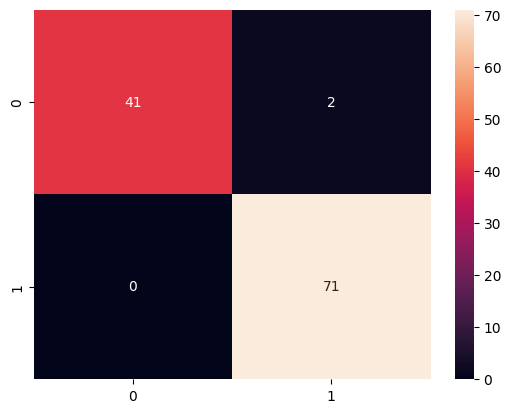

In [30]:
sns.heatmap(conf,annot=True)

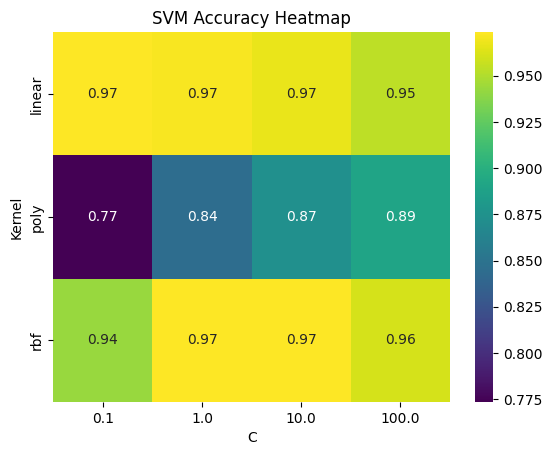

In [32]:
sns.heatmap(
    results_df.groupby(
        ["param_svm__kernel", "param_svm__C"]
    )["mean_test_score"].mean().unstack(),
    annot=True,
    cmap="viridis"
)

plt.title("SVM Accuracy Heatmap")
plt.xlabel("C")
plt.ylabel("Kernel")
plt.show()
